In [1]:
!which python

/opt/anaconda3/envs/ml_/bin/python


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
base_df = pd.read_csv('../data/car_fuel_efficiency.csv')

In [11]:
base_df.head(3)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341


In [12]:
base_cols = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']

df = base_df[base_cols]

### 0: EDA

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

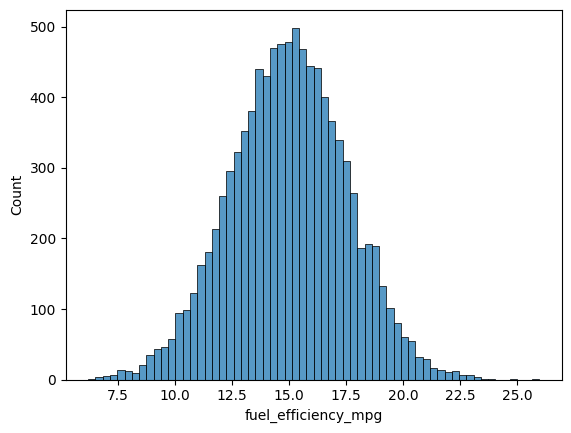

In [13]:
sns.histplot(df['fuel_efficiency_mpg'])

#### Fuel Efficiency had no long tails and looks very 'Normal'

### Q1:

In [14]:
df.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

#### Column with missing values -> 'horsepower'

### Q2:

In [15]:
df.horsepower.median()

np.float64(149.0)

In [20]:
df.describe().horsepower['50%']

np.float64(149.0)

#### Median Horse power is 149.0

### Q3: 

In [21]:
len(df)

9704

In [132]:
# Get number of rows for each split 60% train, 20% val, 20% test
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [133]:
n_train, n_val, n_test

(5824, 1940, 1940)

In [189]:
# Create a randomly shuffled index array from total number of rows
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx) # shuffle index values to be random
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [190]:
# subset the data frame to extract the sections of the indicies
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [191]:
# Reset each split to a stand alone df
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [192]:
# Checks...
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [193]:
df_train.head(3)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822


In [139]:
df_train.isna().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [140]:
y_train = df_train.fuel_efficiency_mpg
y_val = df_val.fuel_efficiency_mpg
y_test = df_test.fuel_efficiency_mpg

In [141]:
y_train

0       16.642943
1       16.298377
2       18.591822
3       11.818843
4       19.402209
          ...    
5819    16.964054
5820    10.059094
5821    17.593237
5822    18.925748
5823    17.965284
Name: fuel_efficiency_mpg, Length: 5824, dtype: float64

In [142]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

#### Let's fill missing values

#### ====== Using 0 ======

In [143]:
df_train0 = df_train.fillna(0)
df_val0 = df_val.fillna(0)
df_test0 = df_test.fillna(0)

df_val0.isna().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [163]:
# Let's update our prep function one more time
def prepare_X(df):
    df = df.copy()
    max_year = df.model_year.max()
    df['age'] = max_year - df.model_year
    del df['model_year']
    features = list(df.columns)
    df_numerical = df[features]
    X = df_numerical.values
    return X

In [164]:
# prepare_X(df_train0)

In [159]:
def train_lR(X, y):
    # Now we need the element at X = 1, for w0
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    # Now to approximate the weights
    w__ = XTX_inv.dot(X.T).dot(y)
    w0 = w__[0]
    w = w__[1:]
    return (w0, w)

In [160]:
# Let's create our rmse
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [161]:
X_train0 = prepare_X(df_train0)
w0, w = train_lR(X_train0, y_train)

X_val0 = prepare_X(df_val0)
y_pred = w0 + X_val0.dot(w)

score0 = np.round(rmse(y_val, y_pred), 2).item() #

In [162]:
score0

0.52

#### ====== Using Mean ======

In [170]:
df_test.isna().sum()

engine_displacement      0
horsepower             143
vehicle_weight           0
model_year               0
dtype: int64

In [173]:
df_test.horsepower.mean()

np.float64(149.61825264329437)

In [174]:
df_trainM = df_train.fillna(df_train.horsepower.mean())
df_valM = df_val.fillna(df_train.horsepower.mean())
df_test0M = df_test.fillna(df_train.horsepower.mean())

df_valM.isna().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [175]:
X_trainM = prepare_X(df_trainM)
w0_M, w_M = train_lR(X_trainM, y_train)

X_valM = prepare_X(df_valM)
y_predM = w0_M + X_valM.dot(w_M)

scoreM = np.round(rmse(y_val, y_predM), 2).item() #

In [176]:
scoreM

0.46

#### Both RMSE values are good, but that of mean is better

### Q4:

In [177]:
# Lets try some regularization

In [178]:
def train_lR_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    eye = r * np.eye(XTX.shape[0])    
    XTX = XTX + eye
    
    XTX_inv = np.linalg.inv(XTX)
    
    # Now to approximate the weights
    w__ = XTX_inv.dot(X.T).dot(y)
    w0 = w__[0]
    w = w__[1:]
    return (w0, w)

In [185]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train0 = prepare_X(df_train0)
    w0, w = train_lR_reg(X_train0, y_train, r=r) #r can be changed to find the best spot
    
    X_val0 = prepare_X(df_val0)
    y_pred = w0 + X_val0.dot(w)
    
    score_reg = np.round(rmse(y_val, y_pred), 6).item()
    print(str(r) +': ', score_reg)

0:  0.517378
0.01:  0.517375
0.1:  0.51736
1:  0.518738
5:  0.553631
10:  0.640757
100:  2.058982


#### The best regularization was 0.01

### Q5:

In [205]:
def split_df(df, seed):
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx) # shuffle index values to be random
    idx
    
    # subset the data frame to extract the sections of the indicies
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    # Reset each split to a stand alone df
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg
    y_val = df_val.fuel_efficiency_mpg
    y_test = df_test.fuel_efficiency_mpg

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    # Quickly fill null values with 0
    df_train0 = df_train.fillna(0)
    df_val0 = df_val.fillna(0)
    df_test0 = df_test.fillna(0)

    return (df_train0, df_val0, df_test0), (y_train, y_val, y_test)

In [206]:
# Testing....
fM, t = split_df(df, 42)

In [207]:
fM[0].head(3)

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017


In [208]:
fM[0].isna().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [211]:
scores = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    fM, targets = split_df(df, s)
    
    X_train = prepare_X(fM[0])
    w0, w = train_lR(X_train, targets[0])
    
    X_val = prepare_X(fM[1])
    y_pred = w0 + X_val.dot(w)
    
    score = np.round(rmse(targets[1], y_pred), 3).item()
    scores.append(score)
    print(str(s) + ': ', score)

0:  0.521
1:  0.521
2:  0.523
3:  0.516
4:  0.511
5:  0.528
6:  0.531
7:  0.509
8:  0.515
9:  0.513


In [214]:
sc = np.array(scores)

In [218]:
np.round(np.std(sc),4)

np.float64(0.0069)

#### Std is ~ closer to 0.006

### Q6:

In [235]:
fM_9, targets_9 = split_df(df, 9)

In [236]:
fM_9[0].head(3)

,engine_displacement,horsepower,vehicle_weight,model_year
0,240,136.0,4050.512290,2006
1,190,141.0,3195.866942,2017
2,200,184.0,3006.164370,2017


In [222]:
df_full_train = pd.concat([fM_9[0], fM_9[1]])

In [223]:
df_full_train = df_full_train.reset_index(drop=True) #Resets the index and drops that column

In [225]:
df_full_train.tail(3)

,engine_displacement,horsepower,vehicle_weight,model_year
7761,180,154.0,3346.965671,2018
7762,210,152.0,2500.175687,2020
7763,260,174.0,2702.257301,2011


In [230]:
len(y_train), len(y_val)

(5824, 1940)

In [237]:
y_train = targets_9[0]
y_val = targets_9[1]

y_full_train = np.concatenate([y_train, y_val])

In [238]:
len(y_full_train)

7764

In [239]:
df_full_train.isna().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [240]:
X_full_train =  prepare_X(df_full_train)

In [241]:
w0, w = train_lR_reg(X_full_train, y_full_train, r=0.001) #r can be changed to find the best spot

In [242]:
df_test = fM_9[2]
y_test = targets_9[2]

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = np.round(rmse(y_test, y_pred), 3).item()
score #Pretty good score achieved!

0.52